<center>
    
# Week 3 Assignment
    
</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 630 <br>
Week 3 <br>
6/19/2024  

</div>


# Los Angeles Dodgers Major League Baseball
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

## Extract Data

   - ### Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2

   - ### Data


In [2]:
path = 'C:\\Users\\Owner\\OneDrive\\Desktop\\DataScience\\2024_Summer_Predictive_Analysis\\'
file = "dodgers-2022.csv"
file_path = path + file
data = pd.DataFrame(pd.read_csv(file_path))

   - ### Data Overview


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [4]:
data.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [5]:
data.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


# Assumptions
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

The following features were promotional efforts for both teams.
> cap <br>
shirt <br>
fireworks <br>
bobblehead <br>

Everyone was equally likely to have come to a game.

All events had equil marketing.

The location are the same for all games.

## Data Cleaning

   - ### Create Date Column


In [6]:
data['month'].unique()

array(['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'], dtype=object)

In [7]:
# month to month numbers
month_map = {
    'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04',
    'MAY': '05', 'JUN': '06', 'JUL': '07', 'AUG': '08',
    'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'
}

In [8]:
# map
data['month_num'] = data['month'].map(month_map)

# format
data['day'] = data['day'].astype(str)

# concat
data['date'] = data['day'] + '-' + data['month_num'] + '-' + '2022'

# format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# drop
data.drop(columns=['month_num', 'month', 'day'], inplace=True)

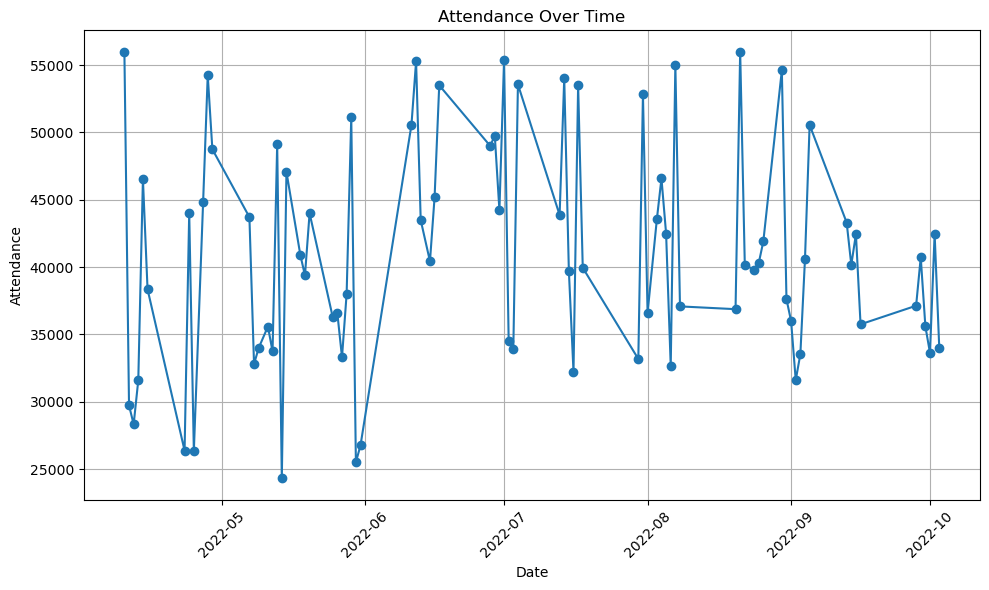

In [10]:
# See what the attendance looks like.

plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['attend'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.title('Attendance Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

   - ### Dummy Columns


In [11]:
data_with_dummies = pd.get_dummies(data, columns=['day_of_week', 'skies', 'day_night', 'opponent'], drop_first=True)

   - ### Format Columns


In [12]:
data_with_dummies['cap'] = data_with_dummies['cap'].map({'YES': True, 'NO': False})
data_with_dummies['shirt'] = data_with_dummies['shirt'].map({'YES': True, 'NO': False})
data_with_dummies['fireworks'] = data_with_dummies['fireworks'].map({'YES': True, 'NO': False})
data_with_dummies['bobblehead'] = data_with_dummies['bobblehead'].map({'YES': True, 'NO': False})

In [13]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   attend                 81 non-null     int64         
 1   temp                   81 non-null     int64         
 2   cap                    81 non-null     bool          
 3   shirt                  81 non-null     bool          
 4   fireworks              81 non-null     bool          
 5   bobblehead             81 non-null     bool          
 6   date                   81 non-null     datetime64[ns]
 7   day_of_week_Monday     81 non-null     bool          
 8   day_of_week_Saturday   81 non-null     bool          
 9   day_of_week_Sunday     81 non-null     bool          
 10  day_of_week_Thursday   81 non-null     bool          
 11  day_of_week_Tuesday    81 non-null     bool          
 12  day_of_week_Wednesday  81 non-null     bool          
 13  skies_C

## Modeling


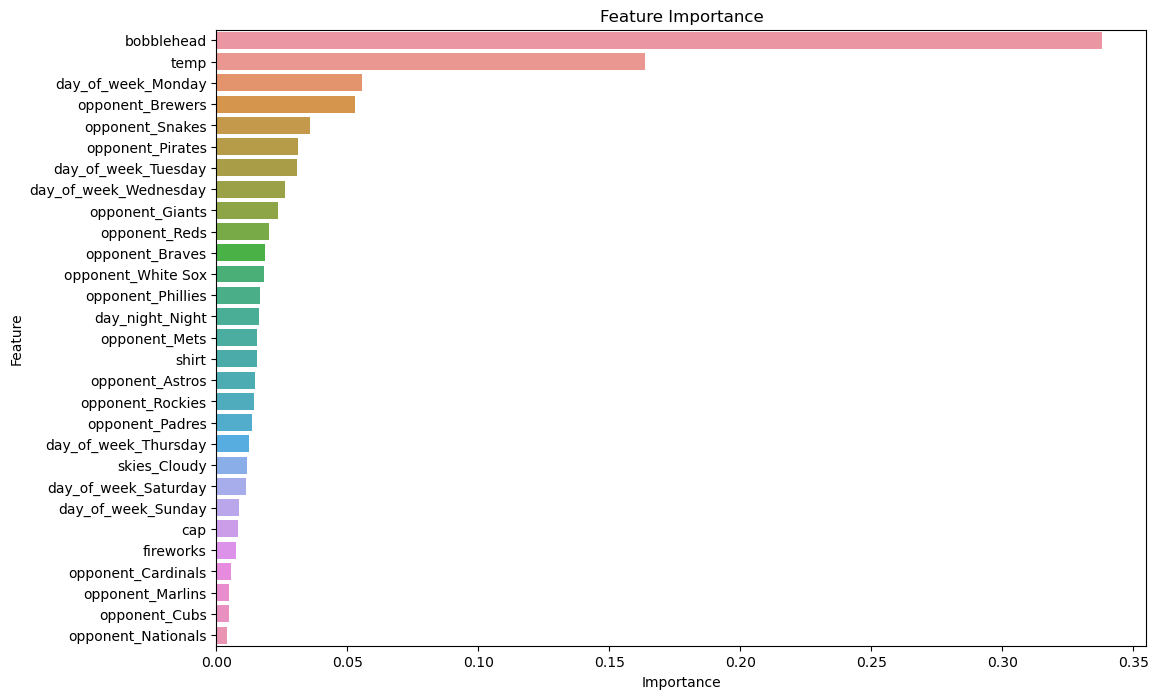

In [14]:
data = data_with_dummies.drop(columns=['date'])

# features and target
X = data.drop(columns=['attend'])
y = data['attend']

# Initialize and fit
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# feature importances
feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

In [15]:
# correlation matrix
corr_matrix = data[['attend', 'temp']].corr()
print(corr_matrix['attend'].sort_values(ascending=False))

attend    1.000000
temp      0.098951
Name: attend, dtype: float64


In [16]:
categorical_features = data.select_dtypes(include=['bool'])

# Chi-Square
chi_scores = chi2(categorical_features, y)

chi_scores_df = pd.DataFrame({
    'Feature': categorical_features.columns,
    'Chi2 Score': chi_scores[0],
    'P-value': chi_scores[1]
}).sort_values(by='Chi2 Score', ascending=False)
print(chi_scores_df)

                  Feature  Chi2 Score   P-value
0                     cap   79.000000  0.478838
12        opponent_Astros   78.000000  0.510678
22      opponent_Phillies   78.000000  0.510678
13        opponent_Braves   78.000000  0.510678
24          opponent_Reds   78.000000  0.510678
18       opponent_Marlins   78.000000  0.510678
16          opponent_Cubs   78.000000  0.510678
1                   shirt   78.000000  0.510678
27     opponent_White Sox   78.000000  0.510678
20     opponent_Nationals   78.000000  0.510678
19          opponent_Mets   77.000000  0.542722
14       opponent_Brewers   77.000000  0.542722
7    day_of_week_Thursday   76.000000  0.574765
15     opponent_Cardinals   74.000000  0.638009
26        opponent_Snakes   72.000000  0.698738
25       opponent_Rockies   72.000000  0.698738
21        opponent_Padres   72.000000  0.698738
9   day_of_week_Wednesday   69.000000  0.781773
4      day_of_week_Monday   69.000000  0.781773
5    day_of_week_Saturday   68.000000  0

Call out <br>
cap: Chi2 Score: 79.0 & P-value: 0.478838 <br>
The presence of a cap has the strongest association with attendance, but the high P-value suggests this association is not statistically significant.

## Suggestions to improve attendance <br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>


   - ### Based on the features that are ideal in predicting attendance we can use those to give the customer what they want.


>> Bobble Heads, Tempature, and day of the week are predictors of attendance.<br>
If the consumer desires bobble heads, then they should know we are selling those. So Market them. <br>
If it is too hot, then we should provide shade and cool air. <br>
If they do not come out on mondays, then do not put matches then. <br>
If it is games with certain teams, then we should have them play more of that team.

   - ### Some suggestions cross ethical lines but they would still improve attendance.


>> We could rig the games, maybe more attendance will come if they have a higher chance at winning. 

## Summary


We pulled data from a csv file.

Made assumptions that the location, marketing, event, was equally likely to have been chosen.

Formatted and cleaned the data.

Determined the best features for knowing the attendance.

Used those features to give the customer what they want being... Cool, Friday, bobble head filled games. 